In [2]:
#Python 3 notebook
import numpy as np
import pandas as pd
from functools import reduce
from math import floor, ceil
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
#Loading the data
data = pd.read_csv('data.csv',header = 1, names =['date', 'prices', 'gold', 'compound', 'neg', 'neu', 'pos' ] )
data = data.set_index('date')
#Obtaining the past data in a different column
data['past_prices'] = data.loc[:,'prices'].shift(30)
data = data.iloc[30:data.shape[0]]
#Splitting train and test dataset
train_size = floor(0.8*data.shape[0])
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size:]
print('Total data size: ',data.shape[0],'. Train data size: ', train_data.shape[0], '. Test data size: ', test_data.shape[0], '.',sep='')

Total data size: 1152. Train data size: 921. Test data size: 231.


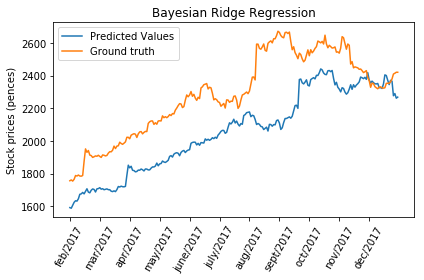

Bayesian Ridge Regressor Stats:
	Score: 0.6232293489307019. Mean Absolute Error: 231.95333159656994. R2 Score: -0.1373844597566074


In [4]:
#Bayesian Ridge
from sklearn import linear_model
brm = linear_model.BayesianRidge()
brm.fit(train_data.loc[:,('past_prices','gold','compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
predicted_brm = brm.predict(test_data.loc[:,('past_prices','gold','compound', 'neg', 'neu', 'pos')].as_matrix())
fig, ax = plt.subplots()
ax.plot( range(0,test_data.shape[0]), predicted_brm, range(0,test_data.shape[0]), test_data.loc[:,'prices'].as_matrix())
plt.legend(['Predicted Values','Ground truth'])
plt.title('Bayesian Ridge Regression')
plt.ylabel('Stock prices (pences)')
xaxis = ['feb/2017','mar/2017','apr/2017','may/2017','june/2017','july/2017','aug/2017','sept/2017','oct/2017','nov/2017','dec/2017','jan/2018']
plt.xticks(np.arange(test_data.shape[0]), xaxis,rotation=60)
ax.set_xticks(ax.get_xticks()[::21])
plt.tight_layout()
plt.show()
# Evaluating the regressor
score_brm = brm.score(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
mean_brm = mean_absolute_error(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_brm))
r2_brm = r2_score(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_brm))
print('Bayesian Ridge Regressor Stats:\n\tScore: ',score_brm,'. Mean Absolute Error: ',mean_brm,'. R2 Score: ',r2_brm, sep='')

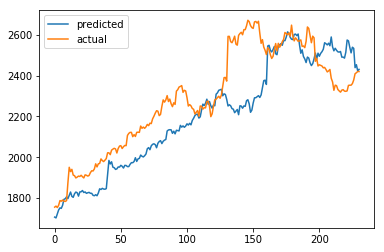

Neural Networks Stats:
	Score: 0.32040289367820274. Mean Absolute Error: 125.22399154305711. R2 Score: 0.5808102999154171


In [114]:
#Neural Networks
from sklearn.neural_network import MLPRegressor

mlpc = MLPRegressor(hidden_layer_sizes=(20) ,alpha=10, activation='relu',learning_rate_init = 0.01, solver='adam', shuffle = False)
mlpc.fit(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
predicted = mlpc.predict(test_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix())
#offset = np.mean(train_data.loc[:,'prices'].as_matrix()) - np.mean(mlpc.predict(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix()))
plt.plot( range(0,test_data.shape[0]), predicted , range(0,test_data.shape[0]), test_data.loc[:,'prices'].as_matrix())
plt.legend(['predicted','actual'])
plt.show()
# Evaluating the regressor
score = mlpc.score(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
mean = mean_absolute_error(list(test_data.loc[:,'prices'].as_matrix()), list(predicted))
r2 = r2_score(list(test_data.loc[:,'prices'].as_matrix()), list(predicted))
print('Neural Networks Stats:\n\tScore: ',score,'. Mean Absolute Error: ',mean,'. R2 Score: ',r2, sep='')

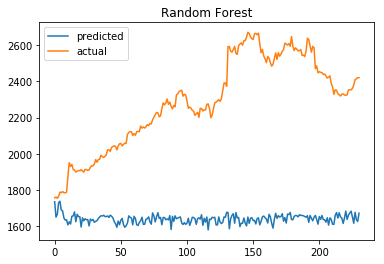

Random Forests Regressor Stats:
	Score: -6.75775487459473. Mean Absolute Error: 645.6199134199135. R2 Score: -6.75775487459473


In [129]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfrm = RandomForestRegressor(n_estimators=20, criterion='mae',
                             max_depth=9)
rfrm.fit(train_data.loc[:,('past_prices','gold','compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
predicted_rfrm = rfrm.predict(test_data.loc[:,('past_prices','gold','compound', 'neg', 'neu', 'pos')].as_matrix())
plt.plot(range(0,test_data.shape[0]), predicted_rfrm, range(0,test_data.shape[0]), test_data.loc[:,'prices'].as_matrix())
plt.legend(['predicted','actual'])
plt.title('Random Forest')
plt.show()
# Evaluating the regressor
score_rfrm = rfrm.score(test_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),test_data.loc[:,'prices'].as_matrix())
mean_rfrm = mean_absolute_error(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_rfrm))
r2_rfrm = r2_score(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_rfrm))
print('Random Forests Regressor Stats:\n\tScore: ',score_rfrm,'. Mean Absolute Error: ',mean_rfrm,'. R2 Score: ',r2_rfrm, sep='')

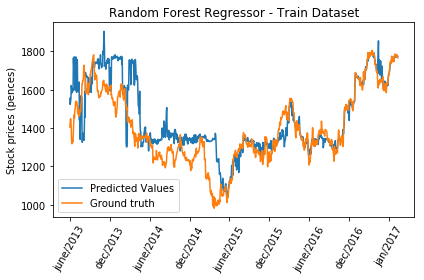

In [128]:
#Plotting the training predictions to check for overfitting
predicted_rfrm = rfrm.predict(train_data.loc[:,('past_prices','gold','compound', 'neg', 'neu', 'pos')].as_matrix())
fig, ax = plt.subplots()
ax.plot(range(0,train_data.shape[0]), predicted_rfrm , range(0,train_data.shape[0]), train_data.loc[:,'prices'].as_matrix())
plt.legend(['Predicted Values','Ground truth'])
plt.title('Random Forest Regressor - Train Dataset')
plt.ylabel('Stock prices (pences)')
xaxis = ['june/2013','dec/2013','june/2014','dec/2014','june/2015','dec/2015','june/2016','dec/2016','jan/2017']
plt.xticks(np.arange(train_data.shape[0]), xaxis,rotation=60)
ax.set_xticks(ax.get_xticks()[::6*19-2])
plt.tight_layout()
plt.show()

Total data size: 732. Train data size: 585. Test data size: 147.


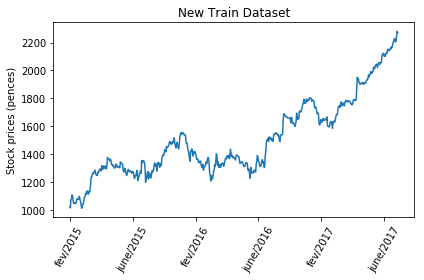

In [130]:
#Reloading the data to trim it
data = pd.read_csv('data.csv',header = 1, names =['date', 'prices', 'gold', 'compound', 'neg', 'neu', 'pos' ] )
data = data.set_index('date')
#Obtaining the past data in a different column
data['past_prices'] = data.loc[:,'prices'].shift(30)
data = data.iloc[450:data.shape[0]]
#Splitting train and test dataset
train_size = floor(0.8*data.shape[0])
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size:]
print('Total data size: ',data.shape[0],'. Train data size: ', train_data.shape[0], '. Test data size: ', test_data.shape[0], '.',sep='')
fig, ax = plt.subplots()
ax.plot(range(0,train_data.shape[0]), train_data.loc[:,'prices'])
plt.title('New Train Dataset')
plt.ylabel('Stock prices (pences)')
xaxis = ['fev/2015','june/2015','fev/2016','june/2016','fev/2017','june/2017']
plt.xticks(np.arange(train_data.shape[0]), xaxis,rotation=60)
ax.set_xticks(ax.get_xticks()[::6*19-2])
plt.tight_layout()
plt.show()

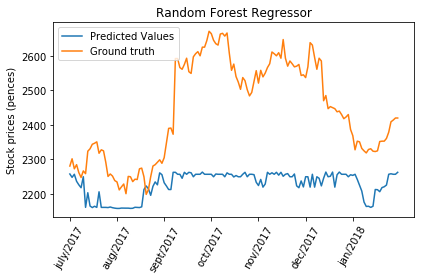

Random Forests Regressor Stats:
	Score: -1.9440940065517136. Mean Absolute Error: 213.21224489795918. R2 Score: -1.9440940065517136


In [133]:
from sklearn.ensemble import RandomForestRegressor
rfrm = RandomForestRegressor(max_depth = 9, criterion='mae',n_estimators=10)
rfrm.fit(train_data.loc[:,('past_prices','gold','compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
predicted_rfrm = rfrm.predict(test_data.loc[:,('past_prices','gold','compound', 'neg', 'neu', 'pos')].as_matrix())
fig, ax = plt.subplots()
ax.plot(range(0,test_data.shape[0]), predicted_rfrm , range(0,test_data.shape[0]), test_data.loc[:,'prices'].as_matrix())
plt.legend(['Predicted Values','Ground truth'], loc = 2)
plt.title('Random Forest Regressor')
plt.ylabel('Stock prices (pences)')
xaxis = ['july/2017','aug/2017','sept/2017','oct/2017','nov/2017','dec/2017','jan/2018']
plt.xticks(np.arange(test_data.shape[0]), xaxis,rotation=60)
ax.set_xticks(ax.get_xticks()[::21])
plt.tight_layout()
plt.show()
# Evaluating the regressor
score_rfrm = rfrm.score(test_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),test_data.loc[:,'prices'].as_matrix())
mean_rfrm = mean_absolute_error(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_rfrm))
r2_rfrm = r2_score(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_rfrm))
print('Random Forests Regressor Stats:\n\tScore: ',score_rfrm,'. Mean Absolute Error: ',mean_rfrm,'. R2 Score: ',r2_rfrm, sep='')